In [24]:
%load_ext autoreload
%autoreload 2
import xarray as xr
from scipy.stats import binned_statistic_2d
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from src.plotting import *
from src.regions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


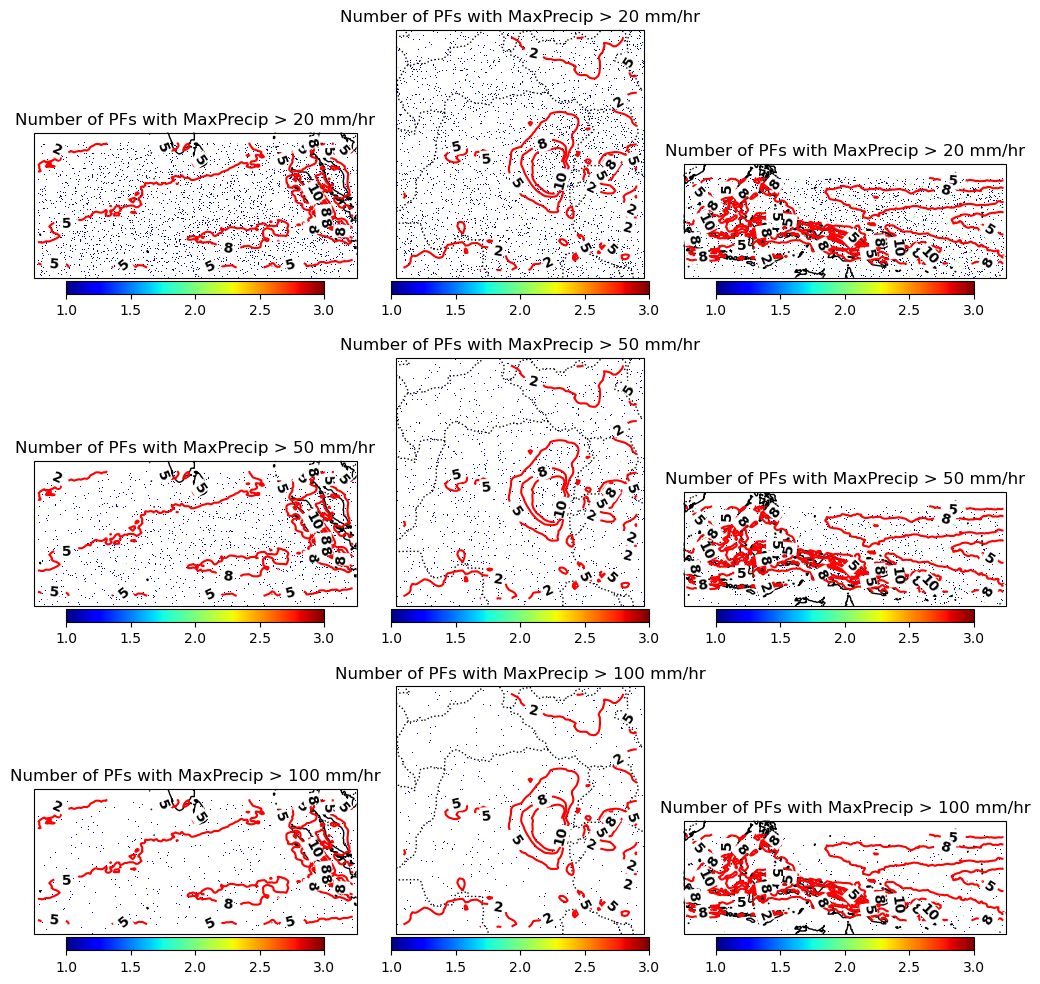

In [65]:
fig, axs = plt.subplots(figsize=(10, 10), ncols=3, nrows=3, subplot_kw={'projection': ccrs.PlateCarree()})
regions = [cio_region(), afc_region(), wmp_region()]
threshs = [20,50,100]

for coli, region in enumerate(regions):
    for rowi, thresh in enumerate(threshs):
        ax = axs[rowi, coli]
        pf_stats = load_pf_stats(region.name)

        lat_bins = np.arange(-60, 60, 0.05)
        lon_bins = np.arange(0, 360, 0.05)

        mean_precip = load_cmorph_mean().sel(region.get_slices())  # convert from mm/d to mm/s
            
        ax.set_extent([region.lon_west-0.5, region.lon_east+0.5, region.lat_south-0.5, region.lat_north+0.5])

        ## Plot the number of extreme PFs
        max_pr = pf_stats.max_precip
        max_pr_pfs = pf_stats[max_pr>=thresh]
        lat, lon = max_pr_pfs.mean_latitude, max_pr_pfs.mean_longitude
        binned_counts = binned_statistic_2d(lat, lon, None, statistic='count', bins=[lat_bins, lon_bins]).statistic
        lat_midpoints = (lat_bins[1:] + lat_bins[:-1])/2
        lon_midpoints = (lon_bins[1:] + lon_bins[:-1])/2
        lon_mesh, lat_mesh = np.meshgrid(lon_midpoints, lat_midpoints)
        cmap = plt.cm.jet.copy()
        cmap.set_under('white')
        norm = colors.Normalize(vmin=1, vmax=3)
        c = ax.pcolormesh(lon_mesh, lat_mesh, binned_counts, cmap=cmap, norm=norm)
        cb = fig.colorbar(c, orientation='horizontal', pad=0.01, shrink=0.8)

        ## Add contours for mean precip
        pr_levels = [2, 5, 8, 10]
        contours = mean_precip.plot.contour(ax=ax, levels=pr_levels, colors='r')

        # Add inline labels to the contours
        labels = ax.clabel(
                contours, fmt='%d', inline=True, fontsize=10, colors='k',
                inline_spacing=5, 
                manual=False,  # Set to True if you want to manually place labels
                rightside_up=True
        )

        # Enhance label readability
        for label in labels:
            label.set_fontweight('bold')  # Make text bold
            label.set_fontsize(10)        # Optional: Increase font size
            label.set_bbox(dict(facecolor='white', edgecolor='none', pad=1))  # Add background box
            label.set_zorder(10)          # Ensure labels are drawn above other elements


        # Add map features
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linestyle=':')

        ax.set_title(f'Number of PFs with MaxPrecip > {thresh} mm/hr')
fig.tight_layout(pad=1)

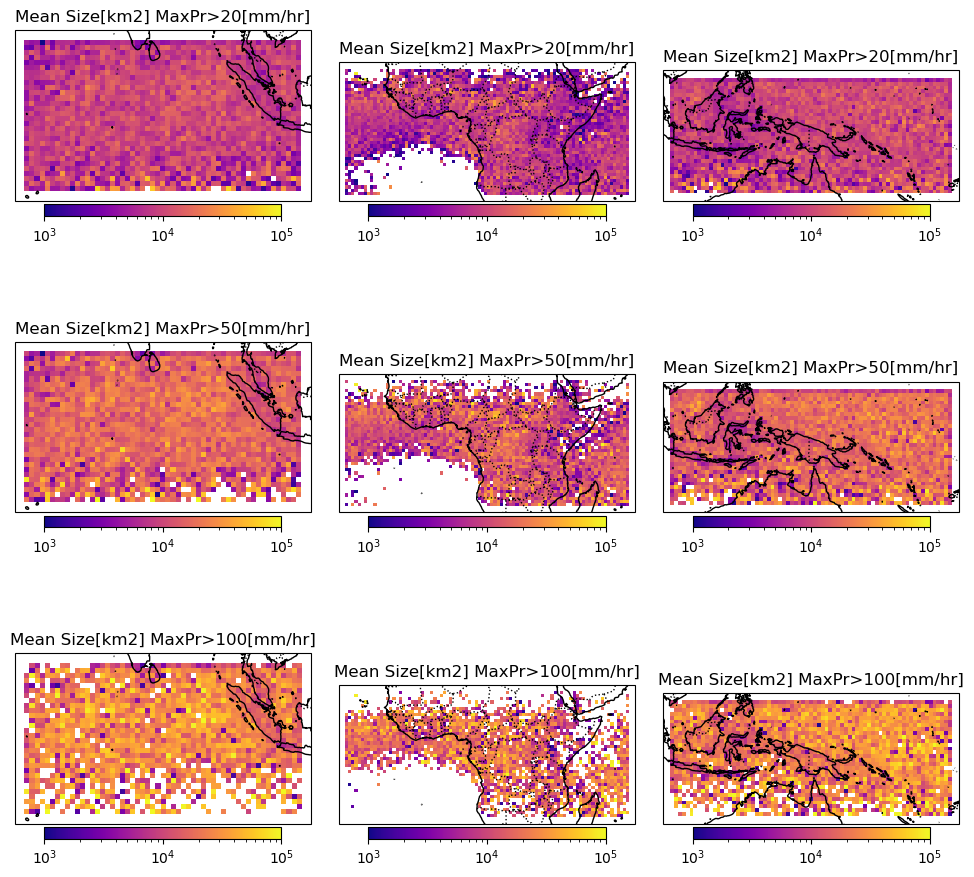

In [103]:
fig, axs = plt.subplots(figsize=(10, 10), ncols=3, nrows=3, subplot_kw={'projection': ccrs.PlateCarree()})
regions = [cio_region(), afc_region(), wmp_region()]
threshs = [20,50,100]

for coli, region in enumerate(regions):
    for rowi, thresh in enumerate(threshs):
        ax = axs[rowi, coli]
        pf_stats = load_pf_stats(region.name)

        lat_bins = np.arange(-60, 60, 1)
        lon_bins = np.arange(0, 360, 1)
        if region.name=='AFC':
            lon_bins = np.arange(-180, 180, 1)
        
        mean_precip = load_cmorph_mean().sel(region.get_slices())  # convert from mm/d to mm/s
            
       

        ## Plot the number of extreme PFs
        max_pr = pf_stats.max_precip
        max_pr_pfs = pf_stats[max_pr>=thresh]
        lat, lon = max_pr_pfs.mean_latitude, max_pr_pfs.mean_longitude
        max_pr_size = max_pr_pfs['num_pixels']*25
        binned_counts = binned_statistic_2d(lat, lon, max_pr_size, statistic=lambda x: np.nanmean(x), bins=[lat_bins, lon_bins]).statistic
        lat_midpoints = (lat_bins[1:] + lat_bins[:-1])/2
        lon_midpoints = (lon_bins[1:] + lon_bins[:-1])/2
        lon_mesh, lat_mesh = np.meshgrid(lon_midpoints, lat_midpoints)
        cmap = plt.cm.plasma.copy()
        norm = colors.LogNorm(vmin=1e3, vmax=1e5)
        c = ax.pcolormesh(lon_mesh, lat_mesh, binned_counts, cmap=cmap, norm=norm)
        cb = fig.colorbar(c, orientation='horizontal', pad=0.01, shrink=0.8)

        # ## Add contours for mean precip
        # pr_levels = [2, 5, 8, 10]
        # contours = mean_precip.plot.contour(ax=ax, levels=pr_levels, colors='r')

        # # Add inline labels to the contours
        # labels = ax.clabel(
        #         contours, fmt='%d', inline=True, fontsize=10, colors='k',
        #         inline_spacing=5, 
        #         manual=False,  # Set to True if you want to manually place labels
        #         rightside_up=True
        # )

        # # Enhance label readability
        # for label in labels:
        #     label.set_fontweight('bold')  # Make text bold
        #     label.set_fontsize(10)        # Optional: Increase font size
        #     label.set_bbox(dict(facecolor='white', edgecolor='none', pad=1))  # Add background box
        #     label.set_zorder(10)          # Ensure labels are drawn above other elements


        # Add map features
        ax.set_extent([lon.min()-2//1, lon.max()+2//1, lat.min()-2//1, lat.max()+2//1], crs=ccrs.PlateCarree())
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linestyle=':')

        ax.set_title(f'Mean Size[km2] MaxPr>{thresh}[mm/hr]')
fig.tight_layout(pad=2)

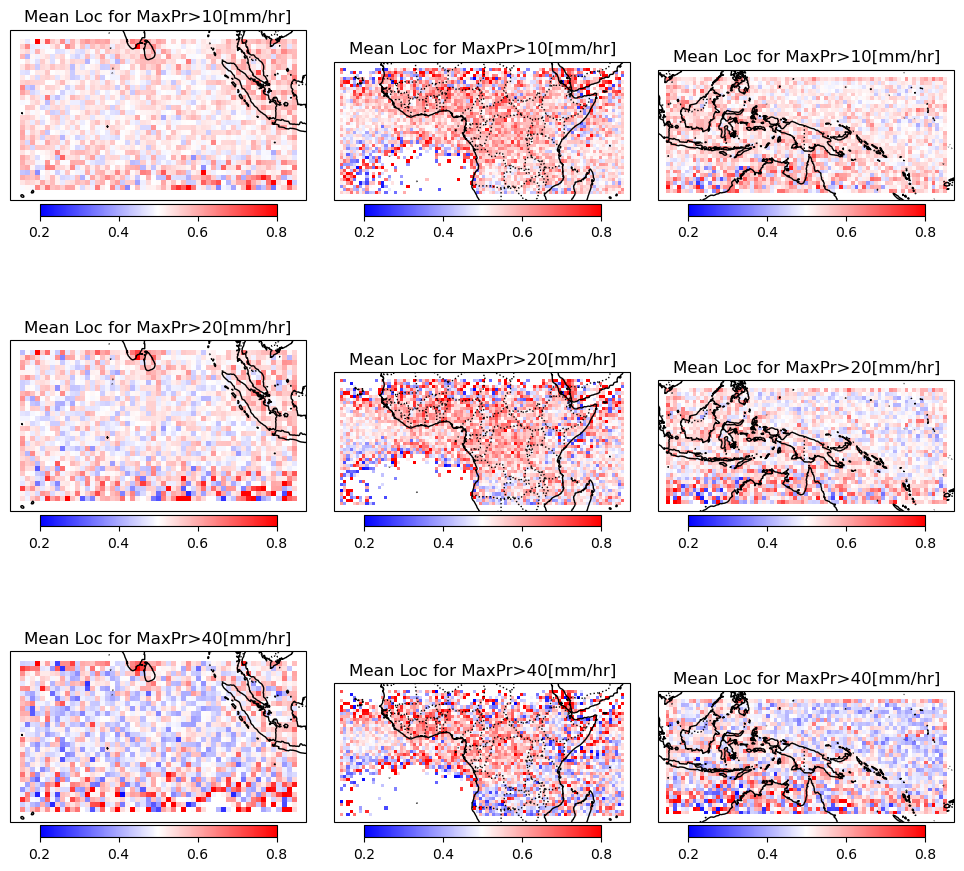

In [110]:
fig, axs = plt.subplots(figsize=(10, 10), ncols=3, nrows=3, subplot_kw={'projection': ccrs.PlateCarree()})
regions = [cio_region(), afc_region(), wmp_region()]
threshs = [10, 20, 40]

for coli, region in enumerate(regions):
    for rowi, thresh in enumerate(threshs):
        ax = axs[rowi, coli]
        pf_stats = load_pf_stats(region.name)

        lat_bins = np.arange(-60, 60, 1)
        lon_bins = np.arange(0, 360, 1)
        if region.name=='AFC':
            lon_bins = np.arange(-180, 180, 1)
        
        mean_precip = load_cmorph_mean().sel(region.get_slices())  # convert from mm/d to mm/s
            
       
        ## Plot the number of extreme PFs
        max_pr = pf_stats.max_precip
        max_pr_pfs = pf_stats[max_pr>=thresh]
        lat, lon = max_pr_pfs.mean_latitude, max_pr_pfs.mean_longitude
        max_pr_size = max_pr_pfs.max_5mmhr_size/max_pr_pfs.num_5mmhr_pixels

        binned_counts = binned_statistic_2d(lat, lon, max_pr_size, statistic=lambda x: np.nanmean(x), bins=[lat_bins, lon_bins]).statistic
        lat_midpoints = (lat_bins[1:] + lat_bins[:-1])/2
        lon_midpoints = (lon_bins[1:] + lon_bins[:-1])/2
        lon_mesh, lat_mesh = np.meshgrid(lon_midpoints, lat_midpoints)
        cmap = plt.cm.bwr.copy()
        cmap.set_under('white')
        norm = colors.TwoSlopeNorm(vmin=0.2, vcenter=0.5, vmax=0.8)
        c = ax.pcolormesh(lon_mesh, lat_mesh, binned_counts, cmap=cmap, norm=norm)
        cb = fig.colorbar(c, orientation='horizontal', pad=0.01, shrink=0.8)

        # ## Add contours for mean precip
        # pr_levels = [2, 5, 8, 10]
        # contours = mean_precip.plot.contour(ax=ax, levels=pr_levels, colors='r')

        # # Add inline labels to the contours
        # labels = ax.clabel(
        #         contours, fmt='%d', inline=True, fontsize=10, colors='k',
        #         inline_spacing=5, 
        #         manual=False,  # Set to True if you want to manually place labels
        #         rightside_up=True
        # )

        # # Enhance label readability
        # for label in labels:
        #     label.set_fontweight('bold')  # Make text bold
        #     label.set_fontsize(10)        # Optional: Increase font size
        #     label.set_bbox(dict(facecolor='white', edgecolor='none', pad=1))  # Add background box
        #     label.set_zorder(10)          # Ensure labels are drawn above other elements


        # Add map features
        ax.set_extent([lon.min()-2//1, lon.max()+2//1, lat.min()-2//1, lat.max()+2//1], crs=ccrs.PlateCarree())
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linestyle=':')

        ax.set_title(f'Mean Loc for MaxPr>{thresh}[mm/hr]')
fig.tight_layout(pad=2)

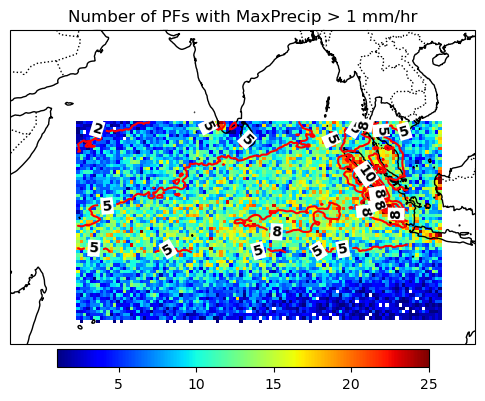

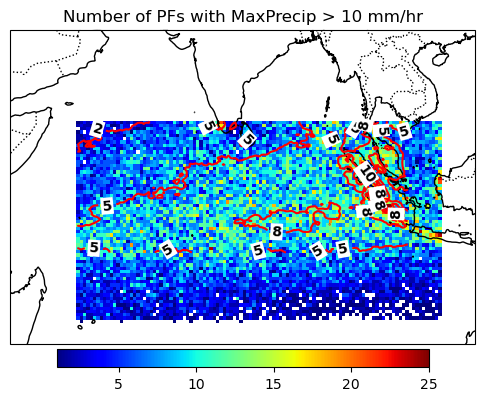

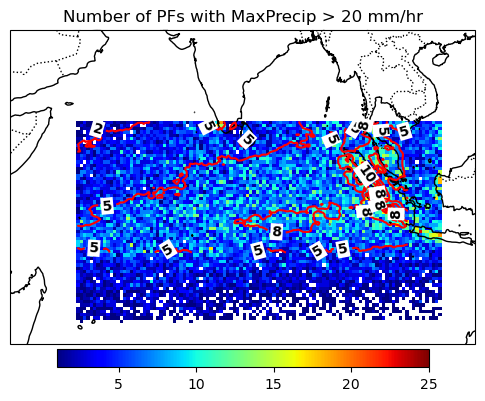

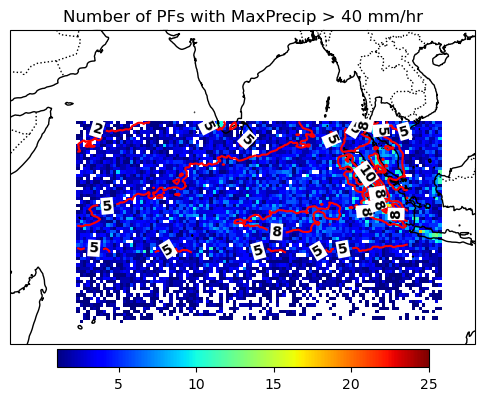

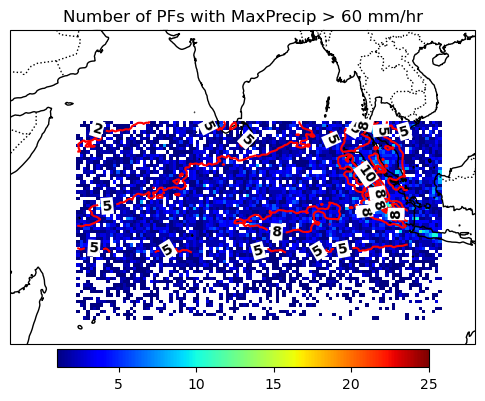

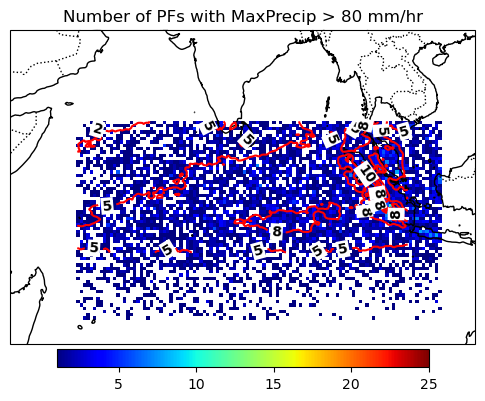

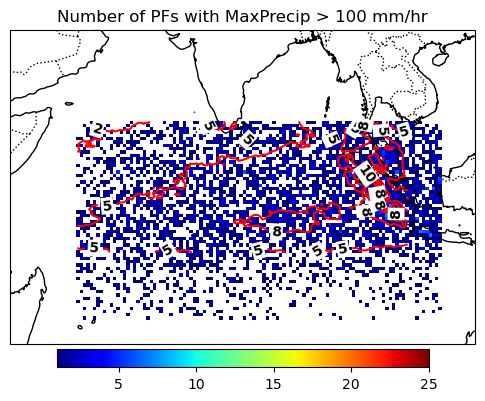

In [47]:
region = cio_region()

pf_stats = load_pf_stats(region.name)

lat_bins = np.arange(-30, 30, 0.5)


mean_precip = load_cmorph_mean().sel(region.get_slices())  # convert from mm/d to mm/s
for thresh in [1,10,20,40,60,80,100]:
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([region.lon_west-10, region.lon_east+10, region.lat_south-10, region.lat_north+10])

    ## Plot the number of extreme PFs
    max_pr = pf_stats.max_precip
    max_pr_pfs = pf_stats[max_pr>=thresh]
    lat, lon = max_pr_pfs.precipitation_centroid_latitude, max_pr_pfs.precipitation_centroid_longitude
    binned_counts = binned_statistic_2d(lat, lon, None, statistic='count', bins=[lat_bins, lon_bins]).statistic
    lat_midpoints = (lat_bins[1:] + lat_bins[:-1])/2
    lon_midpoints = (lon_bins[1:] + lon_bins[:-1])/2
    lon_mesh, lat_mesh = np.meshgrid(lon_midpoints, lat_midpoints)
    cmap = plt.cm.jet.copy()
    cmap.set_under('white')
    norm = colors.Normalize(vmin=1, vmax=25)
    c = ax.pcolormesh(lon_mesh, lat_mesh, binned_counts, cmap=cmap, norm=norm)
    cb = fig.colorbar(c, orientation='horizontal', pad=0.01, shrink=0.8)
    
    ## Add contours for mean precip
    pr_levels = [2, 5, 8, 10]
    contours = mean_precip.plot.contour(ax=ax, levels=pr_levels, colors='r')

    # Add inline labels to the contours
    labels = ax.clabel(
            contours, fmt='%d', inline=True, fontsize=10, colors='k',
            inline_spacing=5, 
            manual=False,  # Set to True if you want to manually place labels
            rightside_up=True
    )

    # Enhance label readability
    for label in labels:
        label.set_fontweight('bold')  # Make text bold
        label.set_fontsize(10)        # Optional: Increase font size
        label.set_bbox(dict(facecolor='white', edgecolor='none', pad=1))  # Add background box
        label.set_zorder(10)          # Ensure labels are drawn above other elements


    # Add map features
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    ax.set_title(f'Number of PFs with MaxPrecip > {thresh} mm/hr')


In [76]:
load_pf_stats('AFC').mean_longitude.min()

-29.935871124267575

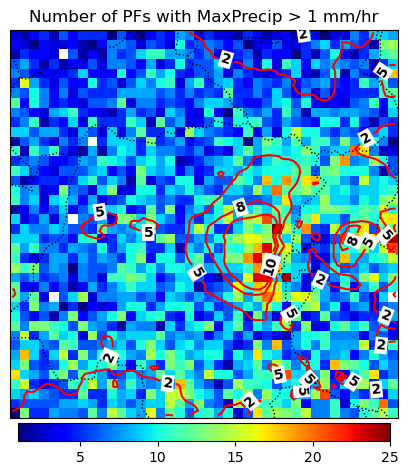

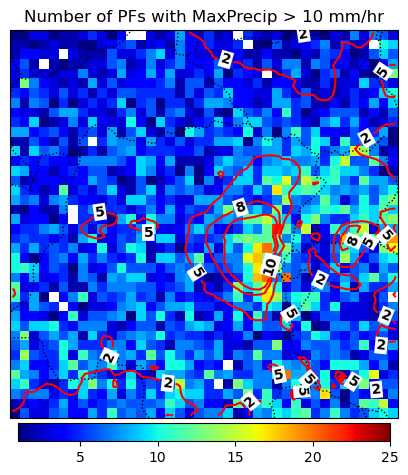

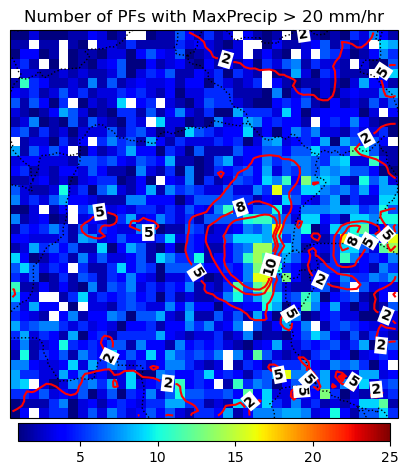

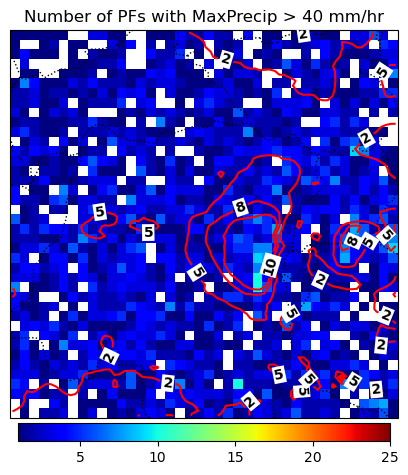

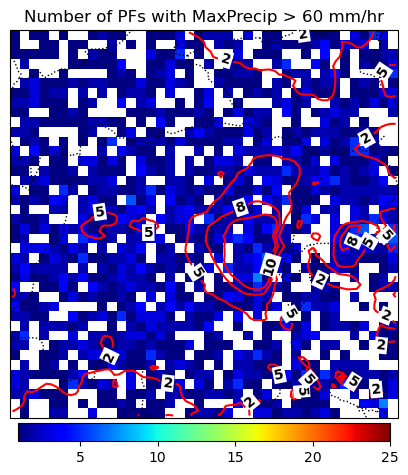

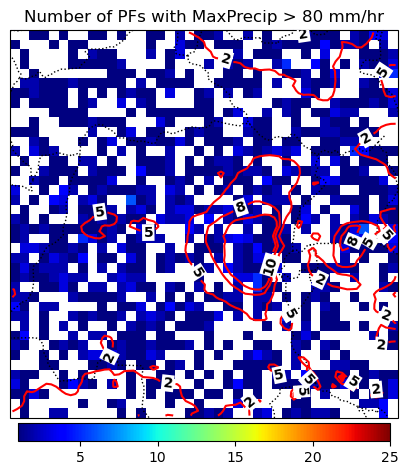

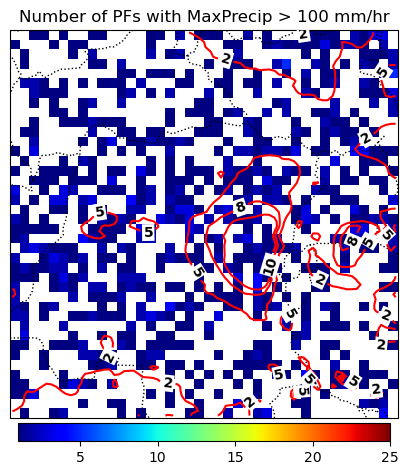

In [73]:
region = afc_region()

pf_stats = load_pf_stats(region.name)

lat_bins = np.arange(-30, 30, 0.5)
lon_bins = np.arange(0, 360, 0.5)

mean_precip = load_cmorph_mean().sel(region.get_slices())  # convert from mm/d to mm/s
for thresh in [1,10,20,40,60,80,100]:
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([region.lon_west, region.lon_east, region.lat_south, region.lat_north])

    ## Plot the number of extreme PFs
    max_pr = pf_stats.max_precip
    max_pr_pfs = pf_stats[max_pr>=thresh]
    lat, lon = max_pr_pfs.precipitation_centroid_latitude, max_pr_pfs.precipitation_centroid_longitude
    binned_counts = binned_statistic_2d(lat, lon, None, statistic='count', bins=[lat_bins, lon_bins]).statistic
    lat_midpoints = (lat_bins[1:] + lat_bins[:-1])/2
    lon_midpoints = (lon_bins[1:] + lon_bins[:-1])/2
    lon_mesh, lat_mesh = np.meshgrid(lon_midpoints, lat_midpoints)
    cmap = plt.cm.jet.copy()
    cmap.set_under('white')
    norm = colors.Normalize(vmin=1, vmax=25)
    c = ax.pcolormesh(lon_mesh, lat_mesh, binned_counts, cmap=cmap, norm=norm)
    cb = fig.colorbar(c, orientation='horizontal', pad=0.01, shrink=0.8)
    
    ## Add contours for mean precip
    pr_levels = [2, 5, 8, 10]
    contours = mean_precip.plot.contour(ax=ax, levels=pr_levels, colors='r')

    # Add inline labels to the contours
    labels = ax.clabel(
            contours, fmt='%d', inline=True, fontsize=10, colors='k',
            inline_spacing=5, 
            manual=False,  # Set to True if you want to manually place labels
            rightside_up=True
    )

    # Enhance label readability
    for label in labels:
        label.set_fontweight('bold')  # Make text bold
        label.set_fontsize(10)        # Optional: Increase font size
        label.set_bbox(dict(facecolor='white', edgecolor='none', pad=1))  # Add background box
        label.set_zorder(10)          # Ensure labels are drawn above other elements


    # Add map features
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    ax.set_title(f'Number of PFs with MaxPrecip > {thresh} mm/hr')


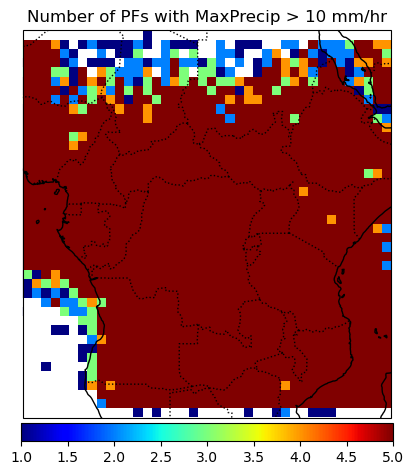

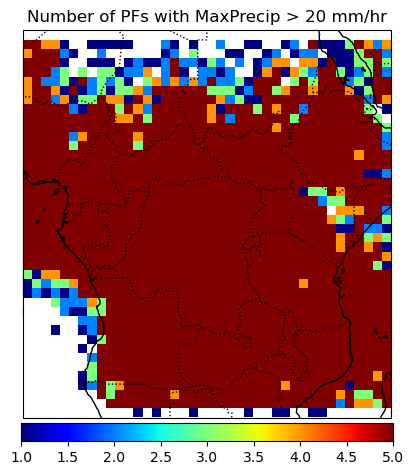

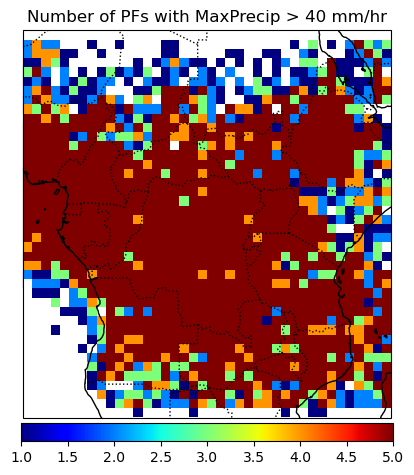

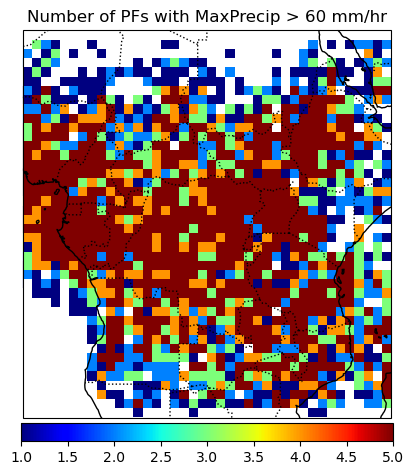

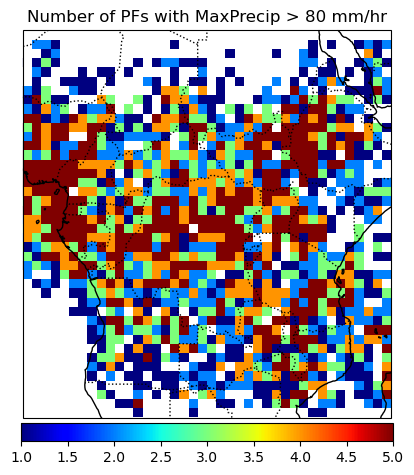

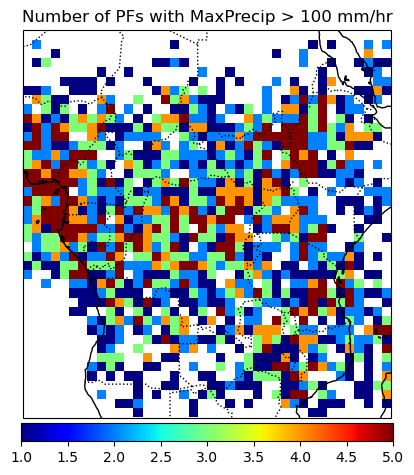

In [51]:
region = afc_region()

pf_stats = load_pf_stats(region.name)

lat_bins = np.arange(-30, 30, 1)
lon_bins = np.arange(0, 360, 1)

for thresh in [10,20,40,60,80,100]:
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([region.lon_west-10, region.lon_east+10, region.lat_south-10, region.lat_north+10])

    max_pr = pf_stats.max_precip
    max_pr_pfs = pf_stats[max_pr>=thresh]

    lat, lon = max_pr_pfs.precipitation_centroid_latitude, max_pr_pfs.precipitation_centroid_longitude

    binned_counts = binned_statistic_2d(lat, lon, None, statistic='count', bins=[lat_bins, lon_bins]).statistic

    lat_midpoints = (lat_bins[1:] + lat_bins[:-1])/2
    lon_midpoints = (lon_bins[1:] + lon_bins[:-1])/2

    lon_mesh, lat_mesh = np.meshgrid(lon_midpoints, lat_midpoints)

    cmap = plt.cm.jet.copy()
    cmap.set_under('white')
    norm = colors.Normalize(vmin=1, vmax=5)
    c = ax.pcolormesh(lon_mesh, lat_mesh, binned_counts, cmap=cmap, norm=norm)
    cb = fig.colorbar(c, orientation='horizontal', pad=0.01, shrink=0.8)
    # Add map features
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    ax.set_title(f'Number of PFs with MaxPrecip > {thresh} mm/hr')


In [4]:
pf_stats

,pf_filename,observation_time,mean_latitude,mean_longitude,precipitation_centroid_latitude,precipitation_centroid_longitude,num_pixels,num_conv_pixels,num_strat_pixels,num_1mmhr_pixels,...,max_5mmhr_size,max_5mmhr_cluster_precip,num_10mmhr_pixels,max_10mmhr_size,max_10mmhr_cluster_precip,total_precip,total_conv_precip,total_strat_precip,max_precip,Iorg
0,/home/disk/tc/pangulo/gpm_pf/CIO/2015/01/pf_00...,20150101_05:41:02,-14.361438,92.484314,-14.384991,92.387826,153,95,58,81,...,7,84.059922,5,5,73.640916,294.790533,193.778424,101.012109,18.893969,0.137074
3,/home/disk/tc/pangulo/gpm_pf/CIO/2015/01/pf_00...,20150103_05:31:58,-11.896283,86.169289,-11.943983,86.132195,565,210,347,298,...,14,141.600741,18,4,81.715611,1195.287408,746.471890,447.211571,29.792807,0.284786
5,/home/disk/tc/pangulo/gpm_pf/CIO/2015/01/pf_00...,20150105_05:21:21,-12.072727,79.917267,-12.057024,79.923493,55,37,18,33,...,3,30.436003,1,1,18.962917,121.698086,94.740651,26.957435,18.962917,0.124744
6,/home/disk/tc/pangulo/gpm_pf/CIO/2015/01/pf_00...,20150105_18:25:12,-6.137500,55.117710,-6.136692,55.098152,48,4,42,2,...,0,0.000000,0,0,0.000000,20.113501,0.880807,18.858288,1.315598,NaN
9,/home/disk/tc/pangulo/gpm_pf/CIO/2015/01/pf_00...,20150116_23:34:15,-1.370890,109.434097,-1.252997,109.330449,371,57,306,208,...,10,106.436907,21,5,79.401070,985.517488,321.927826,662.083680,30.625380,0.568188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83662,/home/disk/tc/pangulo/gpm_pf/CIO/2020/12/pf_40...,20201219_16:50:56,5.518310,77.149651,5.537135,77.315438,142,100,41,70,...,9,100.525585,8,3,48.758214,357.507414,272.195265,85.190624,19.604313,0.104977
83663,/home/disk/tc/pangulo/gpm_pf/CIO/2020/12/pf_40...,20201219_16:50:56,6.209348,76.757385,6.189714,76.688927,230,173,54,116,...,4,61.141214,6,3,53.408995,464.870786,374.006298,90.465325,20.177748,0.091620
83664,/home/disk/tc/pangulo/gpm_pf/CIO/2020/12/pf_41...,20201212_18:14:54,3.299500,87.239006,3.274155,87.265177,100,55,45,49,...,3,45.259729,3,2,40.246284,211.217384,136.429725,74.787658,26.641241,0.150221
83665,/home/disk/tc/pangulo/gpm_pf/CIO/2020/12/pf_43...,20201212_18:14:54,4.454445,87.127769,4.358949,87.052836,45,29,16,24,...,3,48.456494,2,2,43.296888,117.276227,85.417514,31.858713,31.334223,0.132509


In [56]:
region.lat_north

10

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 4))
for ax, region in zip(axs.ravel(), [cio_region(), wmp_region(), afc_region()]):

    pf_stats = load_pf_stats(region.name, 2)
    crh = pf_stats.crh
    saf = 100*(pf_stats.num_strat_pixels)/(pf_stats.num_pixels)
    # saf = 100*(pf_stats.total_strat_precip)/(pf_stats.total_precip)
    data_to_bin = pf_stats.max_precip # change to crh or saf to check that axes are correct
    # data_to_bin = pf_stats.total_precip/pf_stats.num_pixels
    crh_bins = np.arange(0, 100, 2)
    saf_bins = np.arange(0, 100, 2)

    hist = binned_statistic_2d(saf, crh, data_to_bin, bins=[saf_bins, crh_bins]).statistic
    xmesh, ymesh = np.meshgrid(array_midpoints(crh_bins), array_midpoints(saf_bins))
    cmap = plt.cm.plasma
    norm = colors.Normalize(vmin=0, vmax=80)
    c = ax.pcolormesh(xmesh, ymesh, hist, cmap=cmap, norm=norm)
    ax.set_xlabel('CRH [%]')
    ax.set_ylabel('Stratiform Area Frac [%]')
    cb = fig.colorbar(c)
    ax.set_title(f'{region.name} Mean Precip [mm/hr]')

    
fig.tight_layout(pad=1)

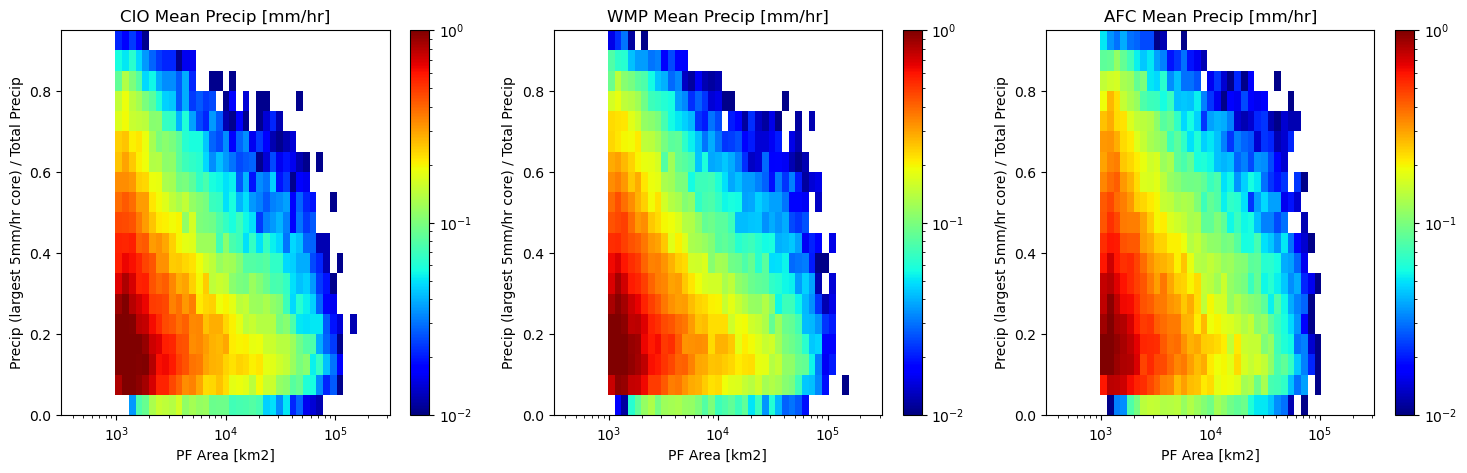

In [21]:
fig, axs = plt.subplots(ncols=3, figsize=(18, 5))
for ax, region in zip(axs.ravel(), [cio_region(), wmp_region(), afc_region()]):
    pf_stats = load_pf_stats(region.name)
    pf_stats = pf_stats[pf_stats.num_5mmhr_pixels>0]
    loc = (pf_stats.max_5mmhr_cluster_precip)/(pf_stats.total_precip)
    size = pf_stats.num_pixels*25
    data_to_bin = (pf_stats.total_precip)/(pf_stats.num_pixels)  # mean precip

    loc_bins = np.arange(0, 1, 0.05)
    size_bins = np.logspace(2.5, 5.5, 50)
    bin_stat= binned_statistic_2d(loc, size, data_to_bin, bins=[loc_bins, size_bins], statistic='count').statistic
    xmesh, ymesh = np.meshgrid(array_midpoints(size_bins), array_midpoints(loc_bins))
    cmap = plt.cm.jet
    cmap.set_under('white')
    norm = colors.LogNorm(vmin=1e-2, vmax=1e0)
    c = ax.pcolormesh(xmesh, ymesh, 100*bin_stat/bin_stat.sum(), cmap=cmap, norm=norm)
    ax.set_xlabel('PF Area [km2]')
    ax.set_ylabel('Precip (largest 5mm/hr core) / Total Precip')
    cb = fig.colorbar(c)
    ax.set_xscale('log')
    ax.set_title(f'{region.name} Mean Precip [mm/hr]')

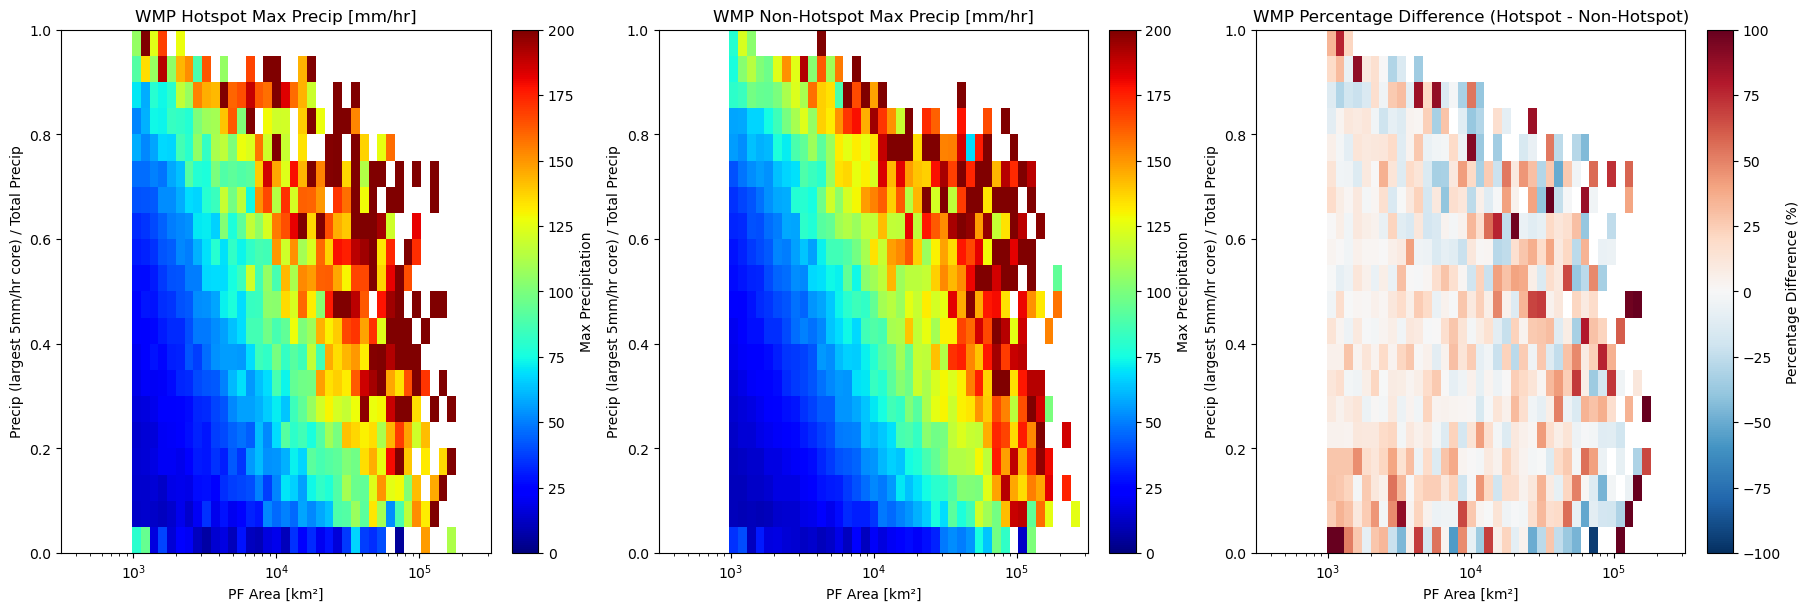

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d
from matplotlib import colors

# Assuming array_midpoints is defined as follows:
def array_midpoints(bins):
    return (bins[:-1] + bins[1:]) / 2

# -----------------------------------------------
# Define Regions and Load Statistics
# -----------------------------------------------

region = wmp_region()
pf_stats = load_pf_stats(region.name)
pf_stats = pf_stats[pf_stats.num_5mmhr_pixels > 0]

# Split into hotspot and non-hotspot based on mean_longitude
hotspot_stats = pf_stats[pf_stats.mean_longitude < 125]
nonhotspot_stats = pf_stats[
    (pf_stats.mean_longitude >= 125) & (pf_stats.mean_longitude <= 160)
]

# -----------------------------------------------
# Define Binning Parameters
# -----------------------------------------------

# Define bin edges
loc_bins = np.arange(0, 1.05, 0.05)  # Added 1.05 to include 1.0
size_bins = np.logspace(2.5, 5.5, 50)

# Function to compute bin statistics
def compute_bin_stat(loc, size, data, loc_bins, size_bins):
    bin_stat = binned_statistic_2d(
        loc, size, data,
        bins=[loc_bins, size_bins],
        statistic=lambda x: np.nanmean(x)
    ).statistic
    return bin_stat

# -----------------------------------------------
# Prepare Data for Plotting
# -----------------------------------------------

# Hotspot Data
hotspot_loc = hotspot_stats.max_5mmhr_cluster_precip / hotspot_stats.total_precip
hotspot_size = hotspot_stats.num_pixels * 25
hotspot_data_to_bin = hotspot_stats.total_precip / hotspot_stats.num_pixels  # mean precip
hotspot_data_to_bin = hotspot_stats.max_precip  # mean precip


bin_stat_hotspot = compute_bin_stat(
    hotspot_loc, hotspot_size, hotspot_data_to_bin,
    loc_bins, size_bins
)

# Non-Hotspot Data
nonhotspot_loc = nonhotspot_stats.max_5mmhr_cluster_precip / nonhotspot_stats.total_precip
nonhotspot_size = nonhotspot_stats.num_pixels * 25
nonhotspot_data_to_bin = nonhotspot_stats.total_precip / nonhotspot_stats.num_pixels  # mean precip
nonhotspot_data_to_bin = nonhotspot_stats.max_precip

bin_stat_nonhotspot = compute_bin_stat(
    nonhotspot_loc, nonhotspot_size, nonhotspot_data_to_bin,
    loc_bins, size_bins
)

# Calculate Percentage Difference
# Avoid division by zero by using np.where
percentage_diff = np.where(
    bin_stat_nonhotspot != 0,
    (bin_stat_hotspot - bin_stat_nonhotspot) / bin_stat_nonhotspot * 100,
    np.nan
)

# Compute midpoints for meshgrid
xmesh, ymesh = np.meshgrid(
    array_midpoints(size_bins),
    array_midpoints(loc_bins)
)

# -----------------------------------------------
# Plotting
# -----------------------------------------------

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Define a common colormap and normalization for hotspot and non-hotspot
cmap = plt.cm.jet
cmap.set_under('white')
norm = colors.Normalize(vmin=0, vmax=200)

# Plot Hotspot Data
c1 = axes[0].pcolormesh(
    xmesh, ymesh, bin_stat_hotspot,
    cmap=cmap, norm=norm, shading='auto'
)
axes[0].set_xscale('log')
axes[0].set_xlabel('PF Area [km²]')
axes[0].set_ylabel('Precip (largest 5mm/hr core) / Total Precip')
axes[0].set_title(f'{region.name} Hotspot Max Precip [mm/hr]')
fig.colorbar(c1, ax=axes[0], label='Max Precipitation')

# Plot Non-Hotspot Data
c2 = axes[1].pcolormesh(
    xmesh, ymesh, bin_stat_nonhotspot,
    cmap=cmap, norm=norm, shading='auto'
)
axes[1].set_xscale('log')
axes[1].set_xlabel('PF Area [km²]')
axes[1].set_ylabel('Precip (largest 5mm/hr core) / Total Precip')
axes[1].set_title(f'{region.name} Non-Hotspot Max Precip [mm/hr]')
fig.colorbar(c2, ax=axes[1], label='Max Precipitation')

# Plot Percentage Difference
# Define a diverging colormap for differences
cmap_diff = plt.cm.RdBu_r
diff_norm = colors.Normalize(vmin=-100, vmax=100)

c3 = axes[2].pcolormesh(
    xmesh, ymesh, percentage_diff,
    cmap=cmap_diff, norm=diff_norm, shading='auto'
)
axes[2].set_xscale('log')
axes[2].set_xlabel('PF Area [km²]')
axes[2].set_ylabel('Precip (largest 5mm/hr core) / Total Precip')
axes[2].set_title(f'{region.name} Percentage Difference (Hotspot - Non-Hotspot)')
fig.colorbar(c3, ax=axes[2], label='Percentage Difference (%)')

# Show the plot
plt.show()


Text(0.5, 1.0, 'WMP Non-Hotspot Mean Precip [mm/hr]')

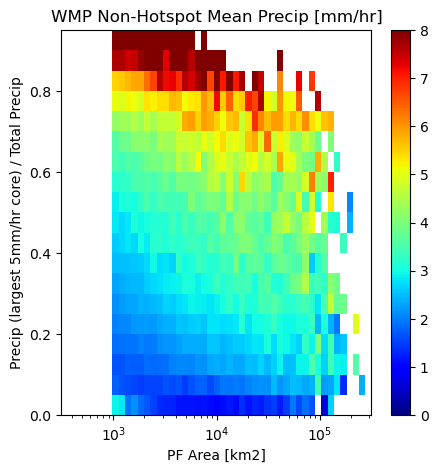

In [33]:
region = wmp_region()
pf_stats = load_pf_stats(region.name)
pf_stats = pf_stats[pf_stats.num_5mmhr_pixels>0]
hotspot_stats = pf_stats[(pf_stats.mean_longitude<125)]
nonhotspot_stats = pf_stats[(pf_stats.mean_longitude>=125) & (pf_stats.mean_longitude<=160)]


### Change the code down here
fig, ax = plt.subplots(figsize=(5, 5))
loc = (pf_stats.max_5mmhr_cluster_precip)/(pf_stats.total_precip)
size = pf_stats.num_pixels*25
data_to_bin = (pf_stats.total_precip)/(pf_stats.num_pixels)  # mean precip

loc_bins = np.arange(0, 1, 0.05)
size_bins = np.logspace(2.5, 5.5, 50)
bin_stat= binned_statistic_2d(loc, size, data_to_bin, bins=[loc_bins, size_bins], statistic=lambda x: np.nanmean(x)).statistic
xmesh, ymesh = np.meshgrid(array_midpoints(size_bins), array_midpoints(loc_bins))
cmap = plt.cm.jet
cmap.set_under('white')
norm = colors.Normalize(vmin=0, vmax=8)
c = ax.pcolormesh(xmesh, ymesh, bin_stat, cmap=cmap, norm=norm)
ax.set_xlabel('PF Area [km2]')
ax.set_ylabel('Precip (largest 5mm/hr core) / Total Precip')
cb = fig.colorbar(c)
ax.set_xscale('log')
ax.set_title(f'{region.name} Non-Hotspot Mean Precip [mm/hr]')

Text(0.5, 1.0, 'WMP Hotspot Max Precip [mm/hr]')

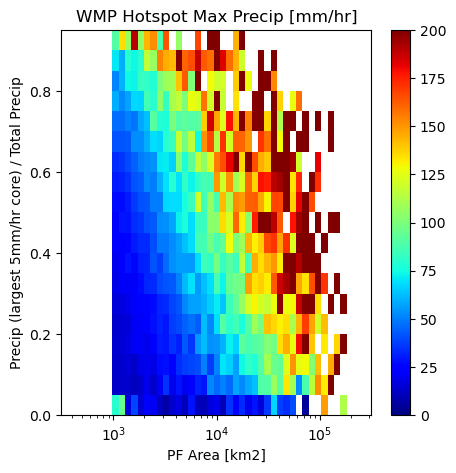

In [35]:
fig, ax = plt.subplots(figsize=(5, 5))
region = wmp_region()
pf_stats = load_pf_stats(region.name)
pf_stats = pf_stats[pf_stats.num_5mmhr_pixels>0]
# pf_stats = pf_stats[(pf_stats.mean_longitude>=125) & (pf_stats.mean_longitude<=160)]
pf_stats = pf_stats[(pf_stats.mean_longitude<125)]
loc = (pf_stats.max_5mmhr_cluster_precip)/(pf_stats.total_precip)
size = pf_stats.num_pixels*25
data_to_bin = pf_stats.max_precip

loc_bins = np.arange(0, 1, 0.05)
size_bins = np.logspace(2.5, 5.5, 50)
bin_stat= binned_statistic_2d(loc, size, data_to_bin, bins=[loc_bins, size_bins], statistic=lambda x: np.nanmean(x)).statistic
xmesh, ymesh = np.meshgrid(array_midpoints(size_bins), array_midpoints(loc_bins))
cmap = plt.cm.jet
cmap.set_under('white')
norm = colors.Normalize(vmin=0, vmax=200)
c = ax.pcolormesh(xmesh, ymesh, bin_stat, cmap=cmap, norm=norm)
ax.set_xlabel('PF Area [km2]')
ax.set_ylabel('Precip (largest 5mm/hr core) / Total Precip')
cb = fig.colorbar(c)
ax.set_xscale('log')
ax.set_title(f'{region.name} Hotspot Max Precip [mm/hr]')

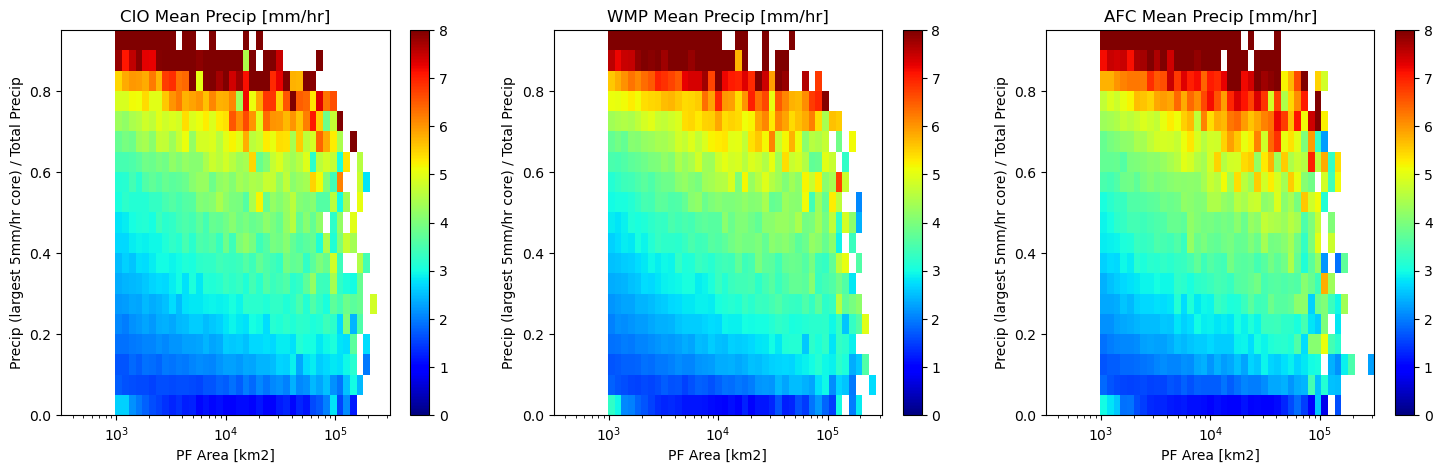

In [7]:
fig, axs = plt.subplots(ncols=3, figsize=(18, 5))
for ax, region in zip(axs.ravel(), [cio_region(), wmp_region(), afc_region()]):
    pf_stats = load_pf_stats(region.name)
    pf_stats = pf_stats[pf_stats.num_5mmhr_pixels>0]
    loc = (pf_stats.max_5mmhr_cluster_precip)/(pf_stats.total_precip)
    size = pf_stats.num_pixels*25
    data_to_bin = (pf_stats.total_precip)/(pf_stats.num_pixels)  # mean precip

    loc_bins = np.arange(0, 1, 0.05)
    size_bins = np.logspace(2.5, 5.5, 50)
    bin_stat= binned_statistic_2d(loc, size, data_to_bin, bins=[loc_bins, size_bins], statistic=lambda x: np.nanmean(x)).statistic
    xmesh, ymesh = np.meshgrid(array_midpoints(size_bins), array_midpoints(loc_bins))
    cmap = plt.cm.jet
    norm = colors.Normalize(vmin=0, vmax=8)
    c = ax.pcolormesh(xmesh, ymesh, bin_stat, cmap=cmap, norm=norm)
    ax.set_xlabel('PF Area [km2]')
    ax.set_ylabel('Precip (largest 5mm/hr core) / Total Precip')
    cb = fig.colorbar(c)
    ax.set_xscale('log')
    ax.set_title(f'{region.name} Mean Precip [mm/hr]')

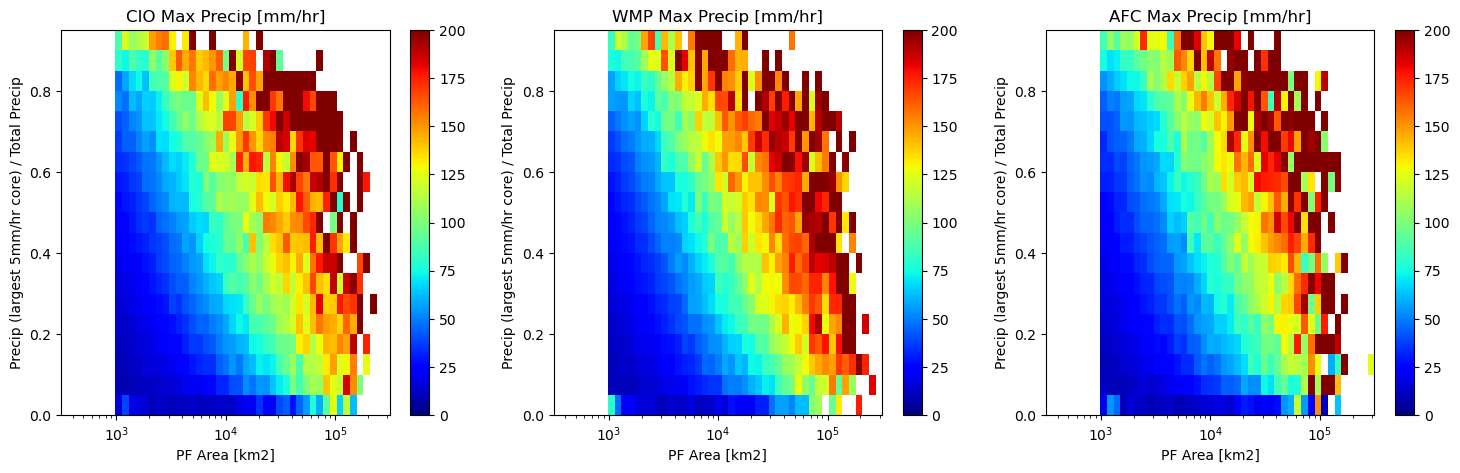

In [109]:
fig, axs = plt.subplots(ncols=3, figsize=(18, 5))
for ax, region in zip(axs.ravel(), [cio_region(), wmp_region(), afc_region()]):
    pf_stats = load_pf_stats(region.name)
    pf_stats = pf_stats[pf_stats.num_5mmhr_pixels>0]
    loc = (pf_stats.max_5mmhr_cluster_precip)/(pf_stats.total_precip)
    size = pf_stats.num_pixels*25
    data_to_bin = pf_stats.max_precip  # mean precip

    loc_bins = np.arange(0, 1, 0.05)
    size_bins = np.logspace(2.5, 5.5, 50)
    bin_stat= binned_statistic_2d(loc, size, data_to_bin, bins=[loc_bins, size_bins], statistic=lambda x: np.nanmean(x)).statistic
    xmesh, ymesh = np.meshgrid(array_midpoints(size_bins), array_midpoints(loc_bins))
    cmap = plt.cm.jet
    norm = colors.Normalize(vmin=0, vmax=200)
    c = ax.pcolormesh(xmesh, ymesh, bin_stat, cmap=cmap, norm=norm)
    ax.set_xlabel('PF Area [km2]')
    ax.set_ylabel('Precip (largest 5mm/hr core) / Total Precip')
    cb = fig.colorbar(c)
    ax.set_xscale('log')
    ax.set_title(f'{region.name} Max Precip [mm/hr]')

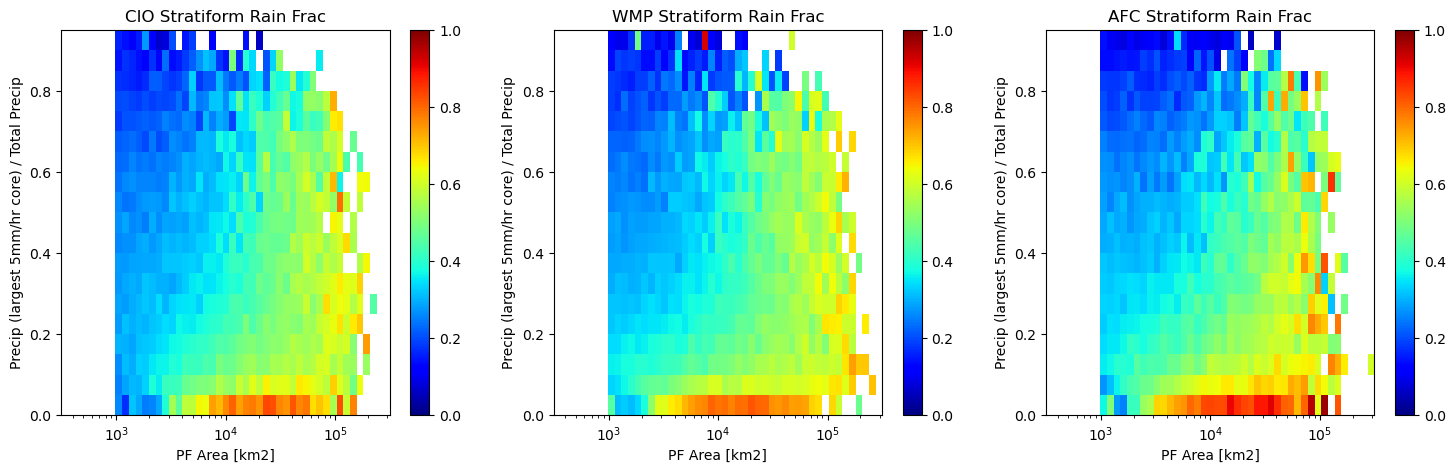

In [111]:
fig, axs = plt.subplots(ncols=3, figsize=(18, 5))
for ax, region in zip(axs.ravel(), [cio_region(), wmp_region(), afc_region()]):
    pf_stats = load_pf_stats(region.name)
    pf_stats = pf_stats[pf_stats.num_5mmhr_pixels>0]
    loc = (pf_stats.max_5mmhr_cluster_precip)/(pf_stats.total_precip)
    size = pf_stats.num_pixels*25
    data_to_bin = pf_stats.total_strat_precip/pf_stats.total_precip  # mean precip

    loc_bins = np.arange(0, 1, 0.05)
    size_bins = np.logspace(2.5, 5.5, 50)
    bin_stat= binned_statistic_2d(loc, size, data_to_bin, bins=[loc_bins, size_bins], statistic=lambda x: np.nanmean(x)).statistic
    xmesh, ymesh = np.meshgrid(array_midpoints(size_bins), array_midpoints(loc_bins))
    cmap = plt.cm.jet
    norm = colors.Normalize(vmin=0, vmax=1)
    c = ax.pcolormesh(xmesh, ymesh, bin_stat, cmap=cmap, norm=norm)
    ax.set_xlabel('PF Area [km2]')
    ax.set_ylabel('Precip (largest 5mm/hr core) / Total Precip')
    cb = fig.colorbar(c)
    ax.set_xscale('log')
    ax.set_title(f'{region.name} Stratiform Rain Frac')

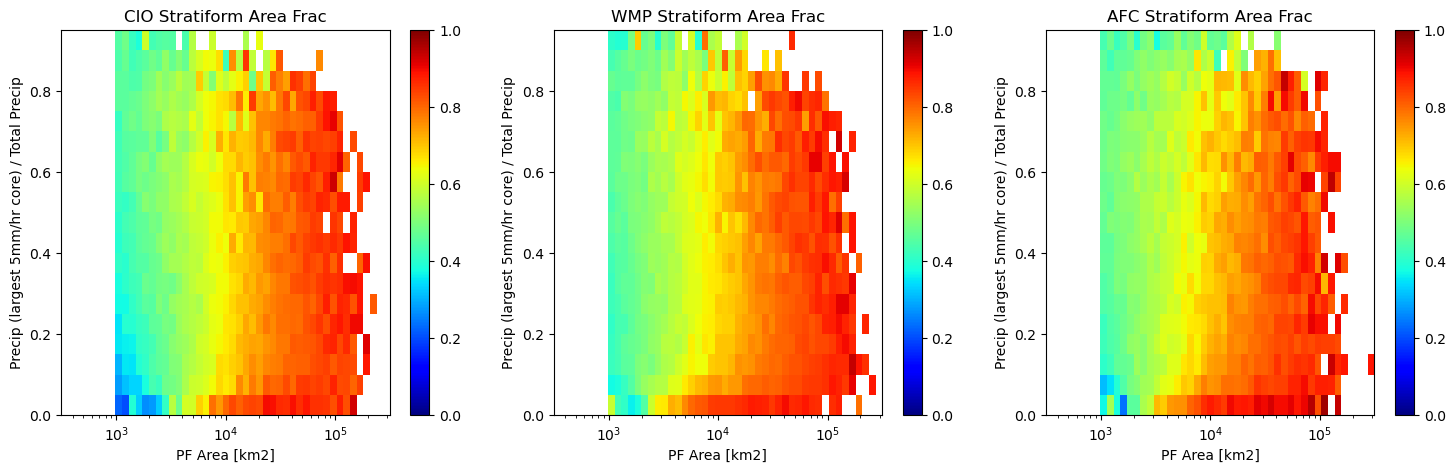

In [113]:
fig, axs = plt.subplots(ncols=3, figsize=(18, 5))
for ax, region in zip(axs.ravel(), [cio_region(), wmp_region(), afc_region()]):
    pf_stats = load_pf_stats(region.name)
    pf_stats = pf_stats[pf_stats.num_5mmhr_pixels>0]
    loc = (pf_stats.max_5mmhr_cluster_precip)/(pf_stats.total_precip)
    size = pf_stats.num_pixels*25
    data_to_bin = pf_stats.num_strat_pixels/pf_stats.num_pixels  # mean precip

    loc_bins = np.arange(0, 1, 0.05)
    size_bins = np.logspace(2.5, 5.5, 50)
    bin_stat= binned_statistic_2d(loc, size, data_to_bin, bins=[loc_bins, size_bins], statistic=lambda x: np.nanmean(x)).statistic
    xmesh, ymesh = np.meshgrid(array_midpoints(size_bins), array_midpoints(loc_bins))
    cmap = plt.cm.jet
    norm = colors.Normalize(vmin=0, vmax=1)
    c = ax.pcolormesh(xmesh, ymesh, bin_stat, cmap=cmap, norm=norm)
    ax.set_xlabel('PF Area [km2]')
    ax.set_ylabel('Precip (largest 5mm/hr core) / Total Precip')
    cb = fig.colorbar(c)
    ax.set_xscale('log')
    ax.set_title(f'{region.name} Stratiform Area Frac')